In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from operator import itemgetter
from nltk.tokenize import TweetTokenizer
from pprint import pprint

In [2]:
import pandas
import json

#f = open('/Users/alinamazi/Data/results/04_11/Exp2_3h/ua.json','r')


dates_UNITED = []
#import json as simplejson
import json
#tweets_data_file = open('/Users/alinamazi/Data/results/04_09_14_Merge/Exp1/ua_merge.json','r')
tweets_data_file = open('/Users/alinamazi/Data/results/April/Exp1/ua.json','r')
tweets_data_file_aa = open('/Users/alinamazi/Data/results/April/Exp1/aa.json','r')


tweet_data = json.load(tweets_data_file)
tweet_data_aa = json.load(tweets_data_file_aa)

#com = defaultdict(lambda : defaultdict(int))

tweets = pd.DataFrame()

dates_UNITED = map(lambda tweet: tweet['created_at'], tweet_data['tweets'])
dates_AA = map(lambda tweet: tweet['created_at'], tweet_data_aa['tweets'])

In [15]:
len(dates_AA)

1401

In [3]:
# a list of "1" to count the tweets
ones = [1]*len(dates_UNITED)
ones_aa = [1]*len(dates_AA)


# the index of the series
idx = pandas.DatetimeIndex(dates_UNITED)
# the actual series (at series of 1s for the moment)
UNITED = pandas.Series(ones, index=idx)

idx_aa = pandas.DatetimeIndex(dates_AA)
AA = pandas.Series(ones_aa, index=idx_aa)

%matplotlib inline
#UNITED.plot()
# Resampling / bucketing
per_minute = UNITED.resample('60Min').sum().fillna(0)
per_minute_aa = AA.resample('60Min').sum().fillna(0)

In [12]:
# all the data together
#match_data = dict(UNITED=per_minute)
match_data = dict(AA=per_minute_aa)

# we need a DataFrame, to accommodate multiple series
all_matches = pandas.DataFrame(data=match_data,
                               index=per_minute_aa.index)
# Resampling as above
#all_matches = all_matches.resample('60Min').sum().fillna(0)
#all_matches = all_matches.sum().fillna(0)


In [13]:
tweet_pd = pandas.DataFrame(data=
    {     
    'Time': all_matches.index,
    'Frequency': per_minute_aa
    })


tweet_pd.to_csv("../TDI/tweets_freq_aa2.csv", sep='\t')

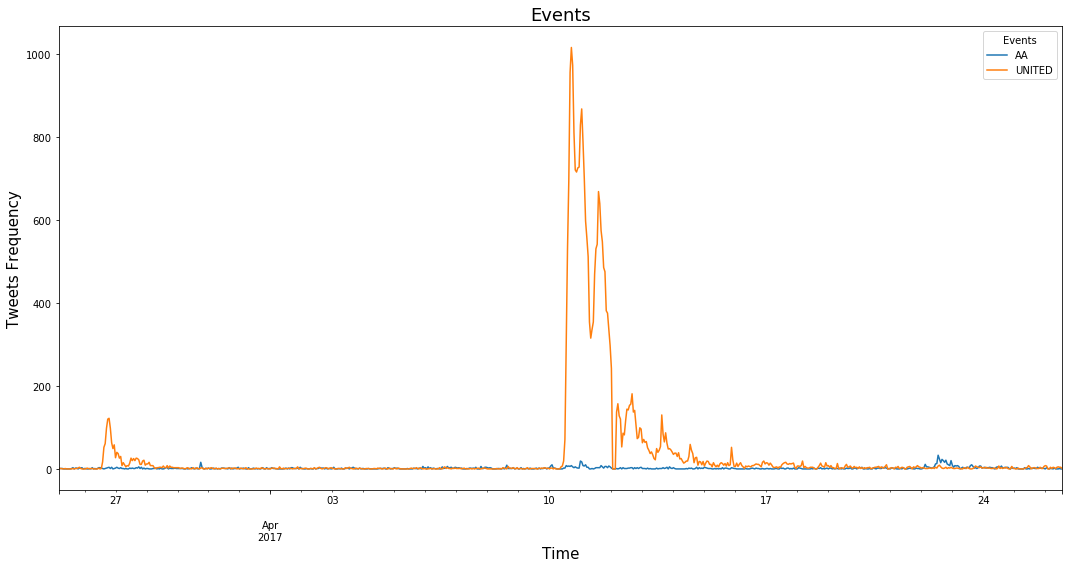

In [5]:
plt = all_matches.plot(figsize=(15,8),fontsize=10)
plt.legend(title='Events')
plt.set_title("Events",fontsize=18)
plt.set_xlabel("Time",fontsize=15)
plt.set_ylabel("Tweets Frequency", fontsize=15)
#plt.axvline('2017-04-09 19:30:00',linestyle='--',color='r')
#plt.text('2017-04-09 19:30:00',900,'First video',color = 'r',fontsize=15)
#plt.text('2017-04-12 04:30:00',900,'event 2',color = 'r',fontsize=14)


labels_all = [e for e in per_minute.index]
#plt.set_xticklabels(labels_all,rotation=90)

#plt.set_xticklabels(labels_all,rotation=90,fontsize=12)
#plt.set_xticks(labels_all,'60Min')

fig = plt.get_figure()
fig.tight_layout()
# fig.savefig('../TDI/timeseries_events_3.png')


In [57]:
max(per_minute.index)

Timestamp('2017-04-26 13:00:00', freq='60T')

In [64]:
start, end = plt.get_xlim()
print start,end

24840240.0 24886860.0


In [15]:

#match_data = dict(UNITED=per_minute)
match_data_ua = dict(UNITED=per_minute)

# we need a DataFrame, to accommodate multiple series
matches_ua = pandas.DataFrame(data=match_data_ua,
                               index=per_minute.index)
# Resampling as above
matches_ua = matches_ua.resample('60Min').sum().fillna(0)
#all_matches = all_matches.sum().fillna(0)


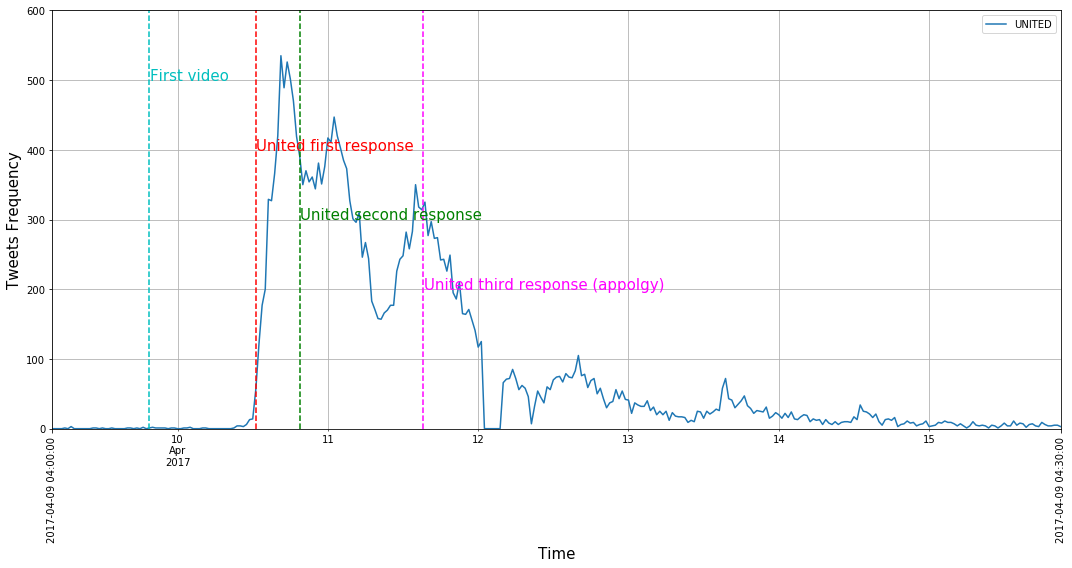

In [17]:
per_thirty = UNITED.resample('30Min').sum().fillna(0)
i = per_thirty['2017-04-09 04:00:00': '2017-04-15 21:00:00']

#match_data = dict(UNITED=per_minute)
match_data_ua = dict(UNITED=per_thirty)

# we need a DataFrame, to accommodate multiple series
matches_ua = pandas.DataFrame(data=match_data_ua,
                               index=per_thirty.index)

plt_ua = matches_ua['2017-04-09 04:00:00':'2017-04-15 21:00:00'].plot(figsize=(15,8),fontsize=10)
plt_ua.set_xlabel("Time",fontsize=15)
plt_ua.set_ylabel("Tweets Frequency", fontsize=15)
plt_ua.grid(b='on',which='both')

labels = [e for e in i.index]
plt_ua.set_xticklabels(labels,rotation=90)

plt_ua.axvline('2017-04-09 19:30:00',linestyle='--',color='c')
plt_ua.text('2017-04-09 19:35:00',500,'First video',color = 'c',fontsize=15)

plt_ua.axvline('2017-04-10 12:27:00',linestyle='--',color='r')
plt_ua.text('2017-04-10 12:30:00',400,'United first response',color = 'r',fontsize=15)

plt_ua.axvline('2017-04-10 19:30:00',linestyle='--',color='green')
plt_ua.text('2017-04-10 19:35:00',300,'United second response',color = 'green',fontsize=15)

plt_ua.axvline('2017-04-11 15:10:00',linestyle='--',color='magenta')
plt_ua.text('2017-04-11 15:20:00',200,'United third response (appolgy)',color = 'magenta',fontsize=15)
plt_ua.set_ylim(0,600)

fig_ua = plt_ua.get_figure()
fig_ua.tight_layout()
fig_ua.savefig('../TDI/timeseries_ua_zoom_3.png')

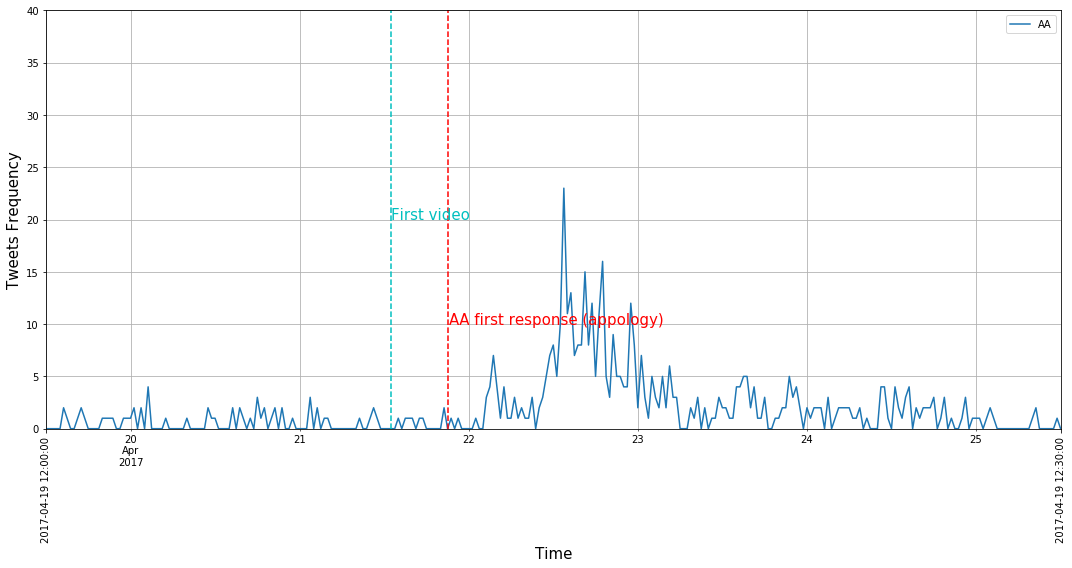

In [16]:
per_thirty_aa = AA.resample('30Min').sum().fillna(0)
i = per_thirty_aa['2017-04-19 12:00:00': '2017-04-25 12:00:00']
#i = per_thirty_aa['2017-04-21 12:00:00': '2017-04-24 12:00:00']


#match_data = dict(UNITED=per_minute)
match_data_aa = dict(AA=per_thirty_aa)

# we need a DataFrame, to accommodate multiple series
matches_aa = pandas.DataFrame(data=match_data_aa,
                               index=per_thirty_aa.index)

plt_aa = matches_aa['2017-04-19 12:00:00': '2017-04-25 12:00:00'].plot(figsize=(15,8),fontsize=10)
plt_aa.set_xlabel("Time",fontsize=15)
plt_aa.set_ylabel("Tweets Frequency",fontsize=15)
plt_aa.grid(b='on',which='both')

labels = [e for e in i.index]
plt_aa.set_xticklabels(labels,rotation=90)

plt_aa.axvline('2017-04-21 12:54:00',linestyle='--',color='c')
plt_aa.text('2017-04-21 12:59:00',20,'First video',color = 'c',fontsize=15)

plt_aa.axvline('2017-04-21 21:06:00',linestyle='--',color='r')
plt_aa.text('2017-04-21 21:16:00',10,'AA first response (appology)',color = 'r',fontsize=15)
plt_aa.set_ylim(0,40)


fig_aa = plt_aa.get_figure()
fig_aa.tight_layout()
fig_aa.savefig('../TDI/timeseries_aa_zoom_3.png')

In [91]:
i = per_minute['2017-04-09 04:00:00': '2017-04-15 21:00:00']
#i.getfield('2017-04-12 04:00:00')
i.index[0]

Timestamp('2017-04-09 04:00:00', freq='60T')

In [66]:
%matplotlib inline
time_chart.to_json('term_freq.json', html_out=True, html_path='chart8.html')
